In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scienceplots
import os

In [2]:
plt.style.use(['science', 'notebook', 'grid'])

In [4]:
# plt.style.available

In [24]:
near_fault = ['san_fernando_nf', 'tabas_nf', 'landers_nf', 'northridge_1050', 'northridge_1051', 'kocaeli_geb_nf', 'kocaeli_iz_nf', 'loma_prieta_nf', 'cape_mendocino', 'l_aquila']
far_fault = ['coyote_lake', 'nw_calif', 'santa_barbara', 'borrego', 'coalinga', 'san_fernando', 'trinidad', 'kocaeli', 'tabas', 'duzce'] 
earthquakes = near_fault + far_fault

In [39]:
fig_size = (18, 6)

Plotting functions

In [10]:
def plot_one(ax, x, y, xlabel, ylabel, title, marker, legend=None):
    h1, = ax.plot(x, y, marker)
    if legend:
        ax.legend([h1], [legend])
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)

In [11]:
def plot_two(ax, x, y, xlabel, ylabel, title, markers, legends):
    y1, y2 = y
    h1, = ax.plot(x, y1, markers[0])
    h2, = ax.plot(x, y2, markers[1])
    ax.legend([h1, h2], legends)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)

Plot PGA vs IDR curve for all earthquakes

In [6]:
# idrs = {}
# for eq in earthquakes:
#     idr = []
#     for scale in np.arange(0.1, 1.1, 0.1).round(1):
#         path = os.path.join(eq, str(scale), 'peaks.csv')
#         df = pd.read_csv(path)
#         idr.append(df['idr'].values[0])
#     idrs[eq] = idr
# idr_df = pd.DataFrame(idrs)

In [7]:
accs = {}
for eq in earthquakes:
    acc = []
    for scale in np.arange(0.1, 1.1, 0.1).round(1):
        path = os.path.join(eq, str(scale), 'peaks.csv')
        df = pd.read_csv(path)
        acc.append(df['acc'].values[0])
    accs[eq] = acc
acc_df = pd.DataFrame(accs)

In [8]:
acc_df

,san_fernando_nf,tabas_nf,landers_nf,northridge_1050,northridge_1051,kocaeli_geb_nf,kocaeli_iz_nf,loma_prieta_nf,cape_mendocino,l_aquila,coyote_lake,nw_calif,santa_barbara,borrego,coalinga,san_fernando,trinidad,kocaeli,tabas
0,2.100223,2.111213,2.839798,1.819055,1.919916,1.882036,1.893487,1.407380,1.238806,2.702727,1.518857,1.578159,1.465663,2.102973,1.527679,2.723477,2.094072,2.209958,1.901011
1,2.511538,4.840052,3.548792,2.712116,3.659924,3.043798,3.206807,2.495700,3.100750,3.610143,2.487264,2.548725,3.341292,4.168705,3.734969,3.094647,3.322043,3.393655,3.001872
2,3.647910,5.641143,4.527380,2.821109,4.312473,3.629070,4.096411,4.232371,2.862039,4.650795,4.252204,2.908334,4.638475,5.218249,3.252731,3.419504,4.516076,3.597411,3.889161
3,4.599327,5.072456,5.094011,2.903747,4.066949,4.317022,3.917662,3.198790,4.143697,5.222400,3.757765,3.306358,4.264346,5.206530,6.209059,4.588742,5.204042,4.602966,4.461168
4,5.375666,5.660580,5.505072,3.725625,3.255474,4.848215,4.333856,4.446773,4.845289,5.102926,4.375184,3.514294,3.210355,5.240575,7.918025,7.982633,5.539989,4.523776,5.046507
5,5.268508,7.667912,5.966115,3.423922,4.009113,4.455068,4.776312,4.383338,6.334489,5.000269,4.149768,4.097973,3.194803,5.528416,7.734064,7.880613,5.494705,4.997012,5.692640
6,5.396592,5.942371,6.101393,3.571259,4.112818,4.654417,5.771223,4.610470,6.133117,4.746516,3.869800,5.449627,3.090772,5.537152,6.500408,6.193221,4.996763,5.005324,5.768510
7,5.621248,6.399685,6.174494,3.713662,5.120038,4.844484,5.592852,4.758509,5.105904,5.763312,4.305947,5.895765,3.731923,6.238255,5.440828,6.596618,5.636250,6.118964,7.652684
8,5.347061,6.795512,6.750573,4.090715,5.746355,4.939836,5.935375,5.121799,6.015618,5.211091,4.427187,6.156682,4.032433,6.271634,6.073897,4.806724,5.791239,6.720567,8.030539
9,6.039008,5.351524,7.242732,4.859949,6.173731,6.358755,5.833335,5.922663,5.263434,4.914793,4.593708,6.318771,4.760839,6.527348,6.069773,5.827995,5.440395,6.985218,7.112437


In [9]:
df

,idr,acc,psd
0,0.077908,7.112437,2.278835


In [17]:
df = acc_df.filter(items = near_fault, axis = 1)
# narr = df.to_numpy()

In [31]:
def get_peaks(eq_type, var, condition = 'normal'):
    """
    eq_type: near_fault or far_fault list
    var: 'acc' or 'psd' string
    condition: 'normal' or 'no_ssi' or 'fixed_base' or 'no_vert' string
    """
    variables = {}
    file = 'peaks'
    if condition != 'normal':
        file = file + '_' + condition
    filename = file + '.csv'
    for eq in earthquakes:
        if eq in eq_type:
            varble = []
            for scale in np.arange(0.1, 1.1, 0.1).round(1):
                path = os.path.join(eq, str(scale), filename)
                df = pd.read_csv(path)
                varble.append(df[var].values[0])
            variables[eq] = varble
    var_df = pd.DataFrame(variables)
    return var_df

In [51]:
a = get_peaks(far_fault, 'psd')

In [60]:
# a

In [59]:
# for col, a in zip(a.columns, a.values.T):
#     print(col)
#     print(a)

In [48]:
factors = factors = np.arange(0.1,1.1,0.1).round(1)

Text(0.02, 0.5, 'Roof Acceleration (m/s$^2$)')

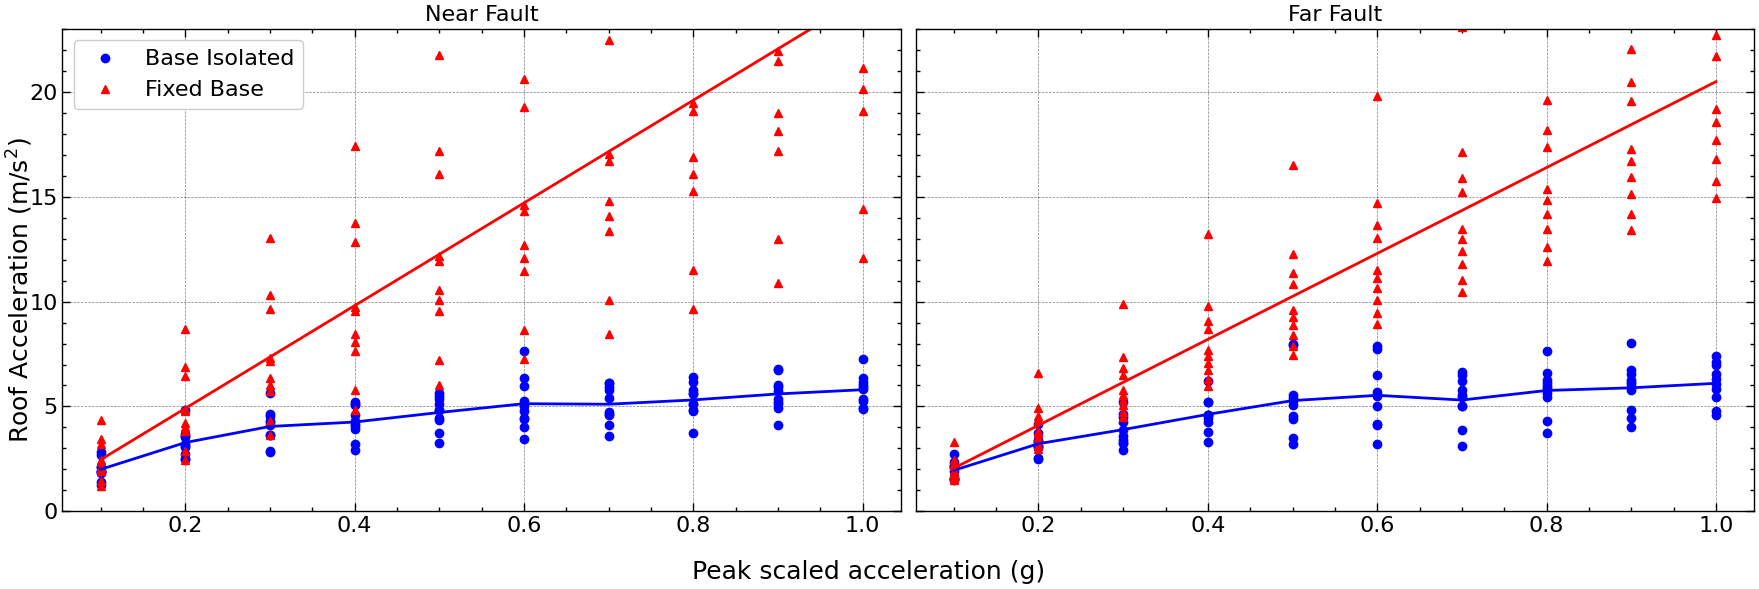

In [61]:
var = 'acc'

fig = plt.figure(figsize = fig_size, tight_layout = True)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharex = ax1)
acc = get_peaks(near_fault, var)
fix_acc = get_peaks(near_fault, var, 'fixed_base')
for arr in acc.values.T:
    ax1.plot(factors, arr, 'bo', label = 'Base Isolated')
for arr in fix_acc.values.T:
    ax1.plot(factors, arr, 'r^', label = 'Fixed Base')
ax1.plot(factors, pd.DataFrame(acc).mean(axis=1), 'b-', label = 'Base Isolated')
ax1.plot(factors, pd.DataFrame(fix_acc).mean(axis=1), 'r-', label = 'Fixed Base')
handles, labels = ax1.get_legend_handles_labels()
# ax1.set_ylabel('IDR (%)')
# ax1.set_xlabel('Peak scaled acceleration (g)')
ax1.set_title('Near Fault')
ax1.legend([handles[0], handles[-3]], [labels[0], labels[-3]])
ax1.set_ylim([0,23])

# Far Fault

acc = get_peaks(far_fault, var)
fix_acc = get_peaks(far_fault, var, 'fixed_base')
for arr in acc.values.T:
    ax2.plot(factors, arr, 'bo', label = 'Base Isolated')
for arr in fix_acc.values.T:
    ax2.plot(factors, arr, 'r^', label = 'Fixed Base')
ax2.plot(factors, pd.DataFrame(acc).mean(axis=1), 'b-', label = 'Base Isolated')
ax2.plot(factors, pd.DataFrame(fix_acc).mean(axis=1), 'r-', label = 'Fixed Base')
# ax2.set_ylabel('IDR (%)')
# ax2.set_xlabel('Peak scaled acceleration (g)')
ax2.set_title('Far Fault')
ax2.set_ylim([0,23])
ax2.label_outer()
fig.supxlabel('Peak scaled acceleration (g)', fontsize = 18)
fig.supylabel('Roof Acceleration (m/s$^2$)', fontsize = 18)
# fig.suptitle('Effect of PFBI on roof acceleration across PGAs', fontsize = 18)
# fig.savefig(os.path.join(dest, f'fix_acc.{fig_format}'))
# tikzplotlib_fix_ncols(fig)
# tikzplotlib.save('test.pgf')
# plt.clf()
# plt.close()

Text(0.02, 0.5, 'Roof Acceleration (m/s$^2$)')

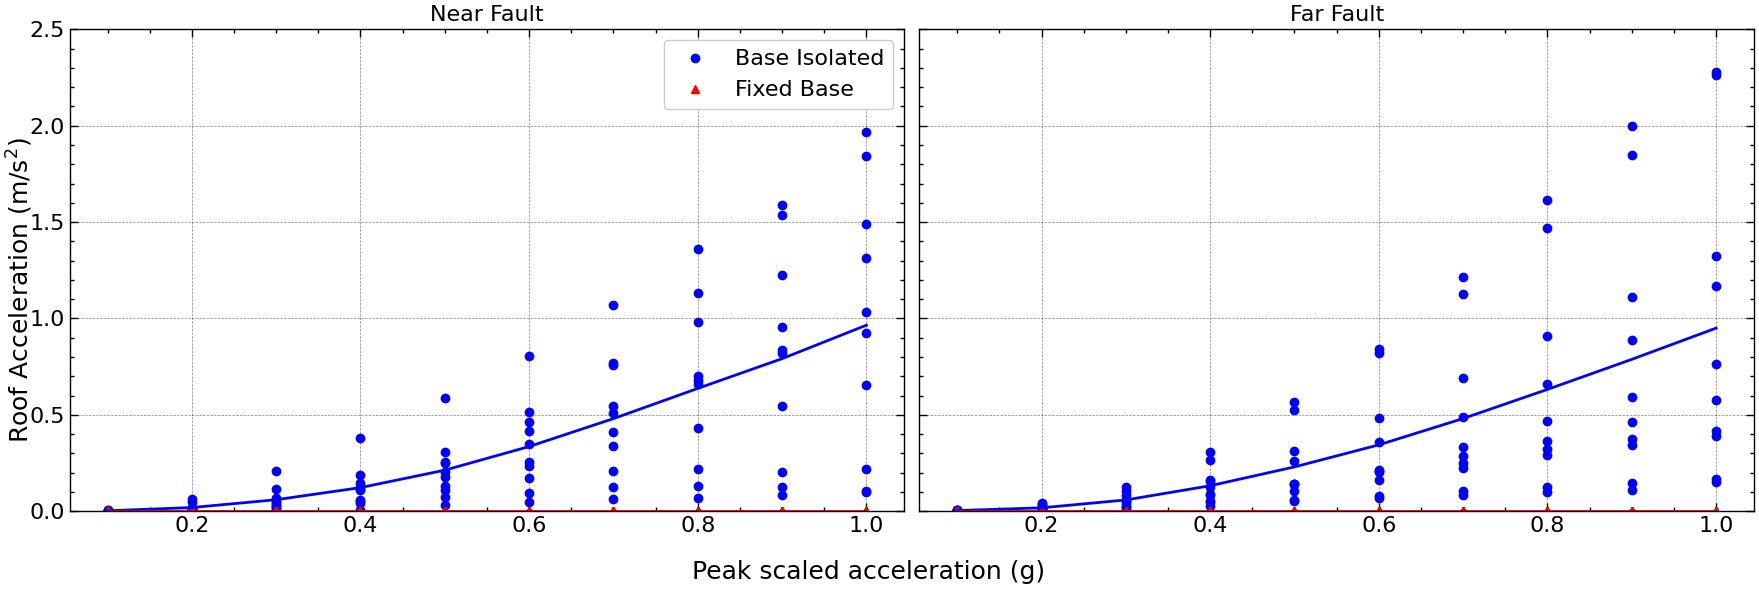

In [65]:
var = 'psd'

fig = plt.figure(figsize = fig_size, tight_layout = True)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharex = ax1)
acc = get_peaks(near_fault, var)
fix_acc = get_peaks(near_fault, var, 'fixed_base')
for arr in acc.values.T:
    ax1.plot(factors, arr, 'bo', label = 'Base Isolated')
for arr in fix_acc.values.T:
    ax1.plot(factors, arr, 'r^', label = 'Fixed Base')
ax1.plot(factors, pd.DataFrame(acc).mean(axis=1), 'b-', label = 'Base Isolated')
ax1.plot(factors, pd.DataFrame(fix_acc).mean(axis=1), 'r-', label = 'Fixed Base')
handles, labels = ax1.get_legend_handles_labels()
# ax1.set_ylabel('IDR (%)')
# ax1.set_xlabel('Peak scaled acceleration (g)')
ax1.set_title('Near Fault')
ax1.legend([handles[0], handles[-3]], [labels[0], labels[-3]])
ax1.set_ylim([0,2.5])

# Far Fault

acc = get_peaks(far_fault, var)
fix_acc = get_peaks(far_fault, var, 'fixed_base')
for arr in acc.values.T:
    ax2.plot(factors, arr, 'bo', label = 'Base Isolated')
for arr in fix_acc.values.T:
    ax2.plot(factors, arr, 'r^', label = 'Fixed Base')
ax2.plot(factors, pd.DataFrame(acc).mean(axis=1), 'b-', label = 'Base Isolated')
ax2.plot(factors, pd.DataFrame(fix_acc).mean(axis=1), 'r-', label = 'Fixed Base')
# ax2.set_ylabel('IDR (%)')
# ax2.set_xlabel('Peak scaled acceleration (g)')
ax2.set_title('Far Fault')
ax2.set_ylim([0,2.5])
ax2.label_outer()
fig.supxlabel('Peak scaled acceleration (g)', fontsize = 18)
fig.supylabel('Roof Acceleration (m/s$^2$)', fontsize = 18)
# fig.suptitle('Effect of PFBI on roof acceleration across PGAs', fontsize = 18)
# fig.savefig(os.path.join(dest, f'fix_acc.{fig_format}'))
# tikzplotlib_fix_ncols(fig)
# tikzplotlib.save('test.pgf')
# plt.clf()
# plt.close()

Text(0.02, 0.5, 'Roof Acceleration (m/s$^2$)')

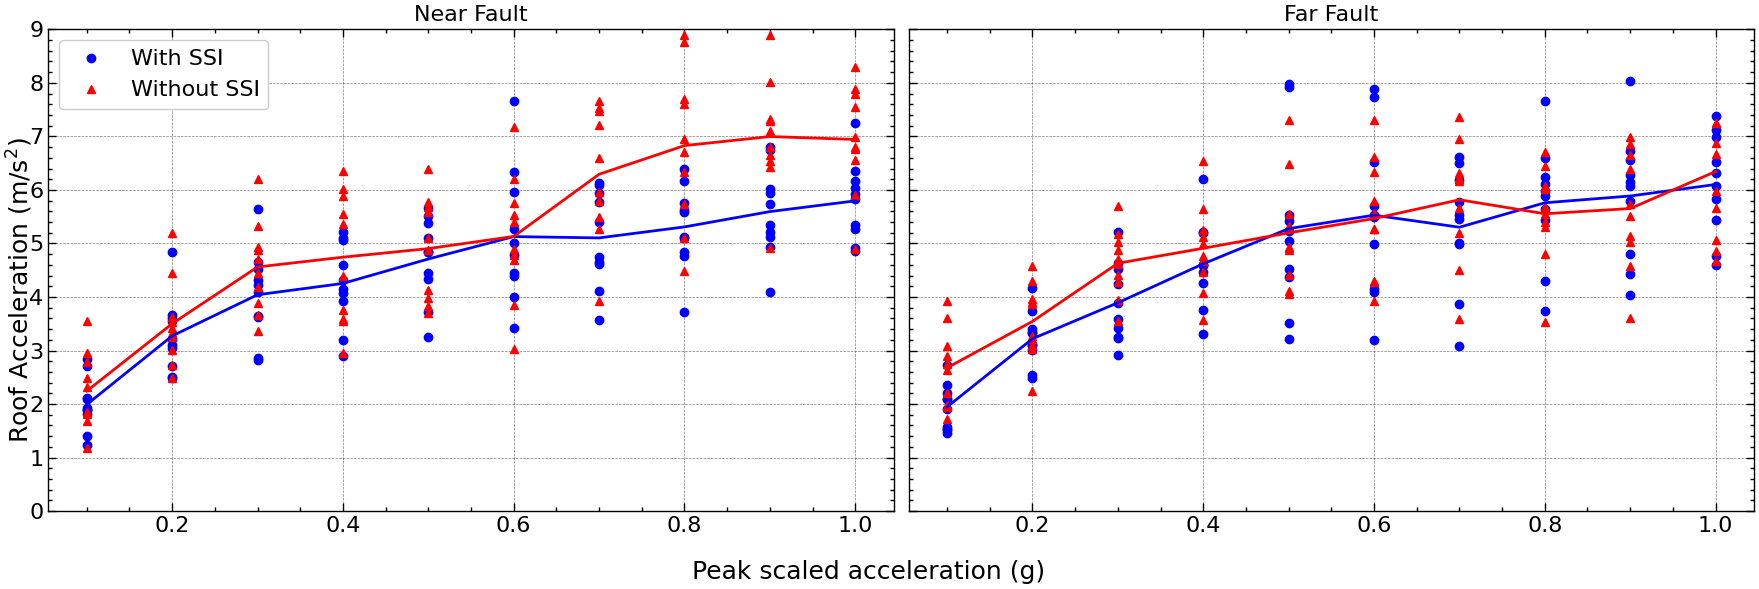

In [68]:
var = 'acc'
influence = 'no_ssi'

fig = plt.figure(figsize = fig_size, tight_layout = True)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharex = ax1)
acc = get_peaks(near_fault, var)
ssi_acc = get_peaks(near_fault, var, influence)
for arr in acc.values.T:
    ax1.plot(factors, arr, 'bo', label = 'With SSI')
for arr in ssi_acc.values.T:
    ax1.plot(factors, arr, 'r^', label = 'Without SSI')
ax1.plot(factors, pd.DataFrame(acc).mean(axis=1), 'b-', label = 'Base Isolated')
ax1.plot(factors, pd.DataFrame(ssi_acc).mean(axis=1), 'r-', label = 'Fixed Base')
handles, labels = ax1.get_legend_handles_labels()
# ax1.set_ylabel('IDR (%)')
# ax1.set_xlabel('Peak scaled acceleration (g)')
ax1.set_title('Near Fault')
ax1.legend([handles[0], handles[-3]], [labels[0], labels[-3]])
ax1.set_ylim([0,9])

# Far Fault

acc = get_peaks(far_fault, var)
ssi_acc = get_peaks(far_fault, var, influence)
for arr in acc.values.T:
    ax2.plot(factors, arr, 'bo', label = 'With SSI')
for arr in ssi_acc.values.T:
    ax2.plot(factors, arr, 'r^', label = 'Without SSI')
ax2.plot(factors, pd.DataFrame(acc).mean(axis=1), 'b-', label = 'Base Isolated')
ax2.plot(factors, pd.DataFrame(ssi_acc).mean(axis=1), 'r-', label = 'Fixed Base')
# ax2.set_ylabel('IDR (%)')
# ax2.set_xlabel('Peak scaled acceleration (g)')
ax2.set_title('Far Fault')
ax2.set_ylim([0,9])
ax2.label_outer()
fig.supxlabel('Peak scaled acceleration (g)', fontsize = 18)
fig.supylabel('Roof Acceleration (m/s$^2$)', fontsize = 18)
# fig.suptitle('Effect of PFBI on roof acceleration across PGAs', fontsize = 18)
# fig.savefig(os.path.join(dest, f'fix_acc.{fig_format}'))
# tikzplotlib_fix_ncols(fig)
# tikzplotlib.save('test.pgf')
# plt.clf()
# plt.close()

Text(0.02, 0.5, 'Roof Acceleration (m/s$^2$)')

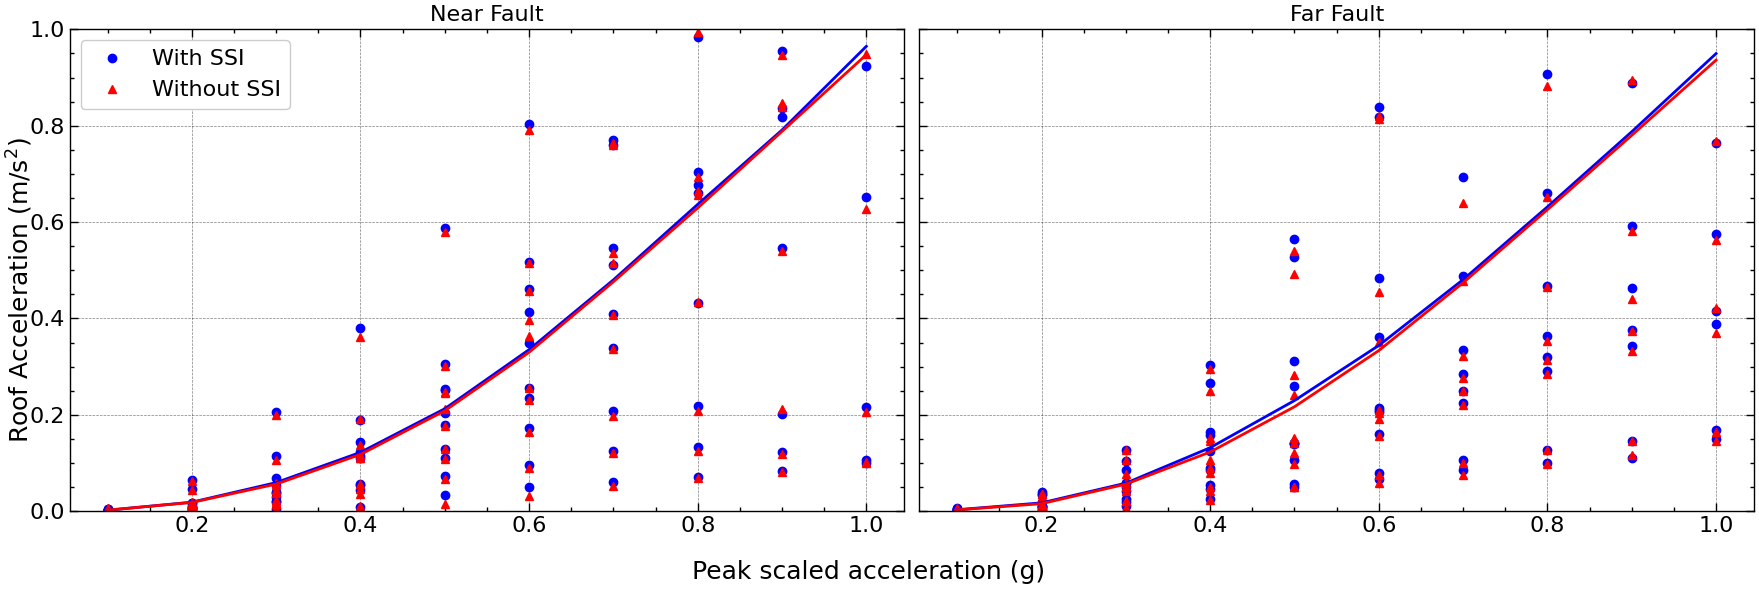

In [71]:
var = 'psd'
influence = 'no_ssi'

fig = plt.figure(figsize = fig_size, tight_layout = True)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharex = ax1)
acc = get_peaks(near_fault, var)
ssi_acc = get_peaks(near_fault, var, influence)
for arr in acc.values.T:
    ax1.plot(factors, arr, 'bo', label = 'With SSI')
for arr in ssi_acc.values.T:
    ax1.plot(factors, arr, 'r^', label = 'Without SSI')
ax1.plot(factors, pd.DataFrame(acc).mean(axis=1), 'b-', label = 'Base Isolated')
ax1.plot(factors, pd.DataFrame(ssi_acc).mean(axis=1), 'r-', label = 'Fixed Base')
handles, labels = ax1.get_legend_handles_labels()
# ax1.set_ylabel('IDR (%)')
# ax1.set_xlabel('Peak scaled acceleration (g)')
ax1.set_title('Near Fault')
ax1.legend([handles[0], handles[-3]], [labels[0], labels[-3]])
ax1.set_ylim([0,1.0])

# Far Fault

acc = get_peaks(far_fault, var)
ssi_acc = get_peaks(far_fault, var, influence)
for arr in acc.values.T:
    ax2.plot(factors, arr, 'bo', label = 'With SSI')
for arr in ssi_acc.values.T:
    ax2.plot(factors, arr, 'r^', label = 'Without SSI')
ax2.plot(factors, pd.DataFrame(acc).mean(axis=1), 'b-', label = 'Base Isolated')
ax2.plot(factors, pd.DataFrame(ssi_acc).mean(axis=1), 'r-', label = 'Fixed Base')
# ax2.set_ylabel('IDR (%)')
# ax2.set_xlabel('Peak scaled acceleration (g)')
ax2.set_title('Far Fault')
ax2.set_ylim([0,1.0])
ax2.label_outer()
fig.supxlabel('Peak scaled acceleration (g)', fontsize = 18)
fig.supylabel('Roof Acceleration (m/s$^2$)', fontsize = 18)
# fig.suptitle('Effect of PFBI on roof acceleration across PGAs', fontsize = 18)
# fig.savefig(os.path.join(dest, f'fix_acc.{fig_format}'))
# tikzplotlib_fix_ncols(fig)
# tikzplotlib.save('test.pgf')
# plt.clf()
# plt.close()

Text(0.02, 0.5, 'Roof Acceleration (m/s$^2$)')

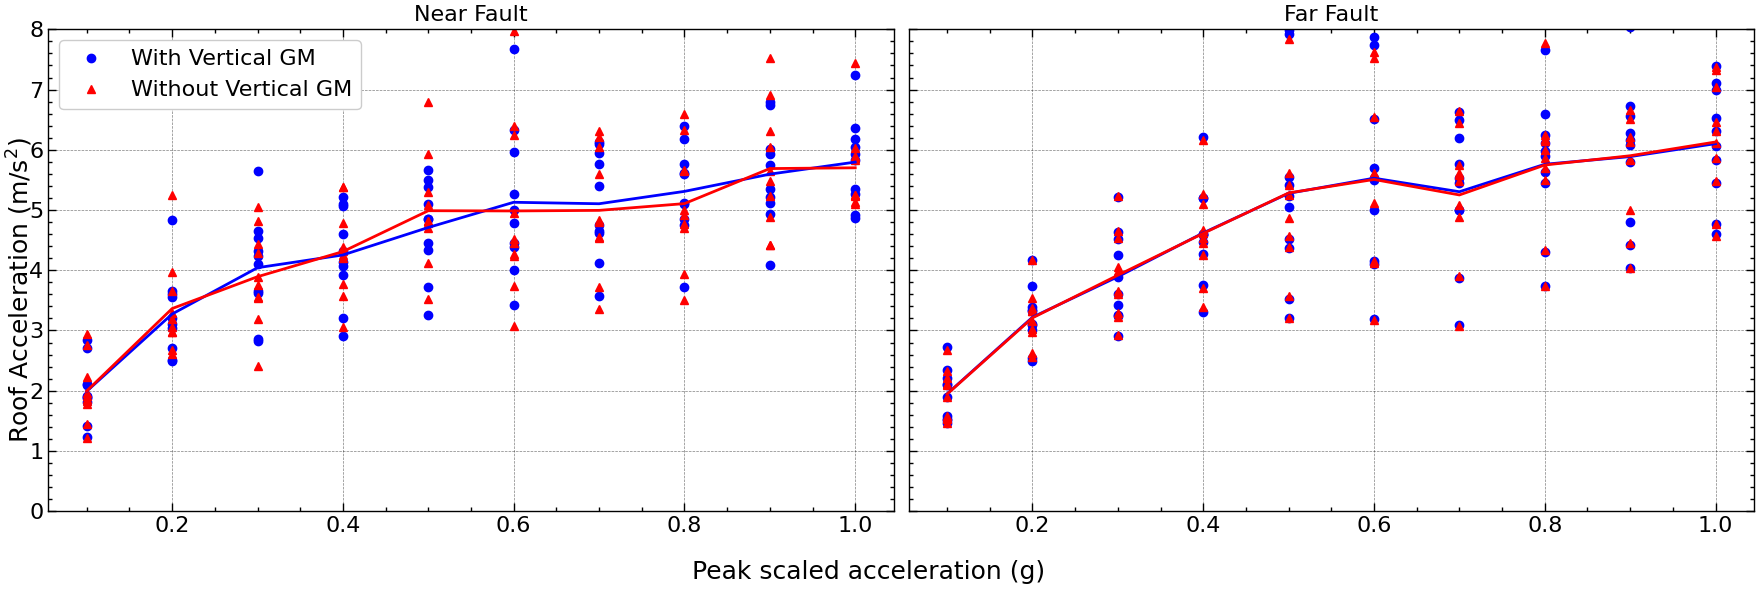

In [75]:
var = 'acc'
influence = 'no_vert'

fig = plt.figure(figsize = fig_size, tight_layout = True)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharex = ax1)
acc = get_peaks(near_fault, var)
ssi_acc = get_peaks(near_fault, var, influence)
for arr in acc.values.T:
    ax1.plot(factors, arr, 'bo', label = 'With Vertical GM')
for arr in ssi_acc.values.T:
    ax1.plot(factors, arr, 'r^', label = 'Without Vertical GM')
ax1.plot(factors, pd.DataFrame(acc).mean(axis=1), 'b-', label = 'Base Isolated')
ax1.plot(factors, pd.DataFrame(ssi_acc).mean(axis=1), 'r-', label = 'Fixed Base')
handles, labels = ax1.get_legend_handles_labels()
# ax1.set_ylabel('IDR (%)')
# ax1.set_xlabel('Peak scaled acceleration (g)')
ax1.set_title('Near Fault')
ax1.legend([handles[0], handles[-3]], [labels[0], labels[-3]])
ax1.set_ylim([0,8])

# Far Fault

acc = get_peaks(far_fault, var)
ssi_acc = get_peaks(far_fault, var, influence)
for arr in acc.values.T:
    ax2.plot(factors, arr, 'bo', label = 'With SSI')
for arr in ssi_acc.values.T:
    ax2.plot(factors, arr, 'r^', label = 'Without SSI')
ax2.plot(factors, pd.DataFrame(acc).mean(axis=1), 'b-', label = 'Base Isolated')
ax2.plot(factors, pd.DataFrame(ssi_acc).mean(axis=1), 'r-', label = 'Fixed Base')
# ax2.set_ylabel('IDR (%)')
# ax2.set_xlabel('Peak scaled acceleration (g)')
ax2.set_title('Far Fault')
ax2.set_ylim([0,8])
ax2.label_outer()
fig.supxlabel('Peak scaled acceleration (g)', fontsize = 18)
fig.supylabel('Roof Acceleration (m/s$^2$)', fontsize = 18)
# fig.suptitle('Effect of PFBI on roof acceleration across PGAs', fontsize = 18)
# fig.savefig(os.path.join(dest, f'fix_acc.{fig_format}'))
# tikzplotlib_fix_ncols(fig)
# tikzplotlib.save('test.pgf')
# plt.clf()
# plt.close()

Text(0.02, 0.5, 'Roof Acceleration (m/s$^2$)')

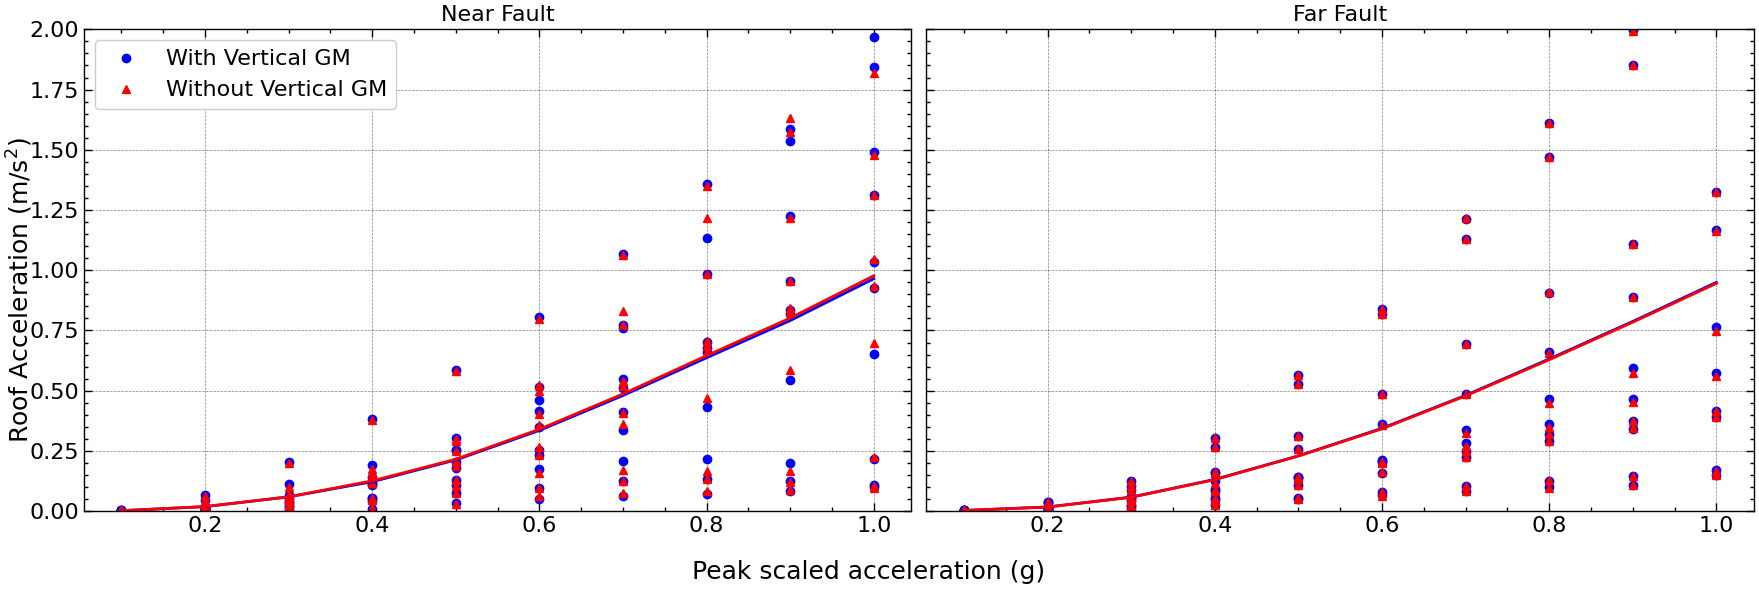

In [77]:
var = 'psd'
influence = 'no_vert'

fig = plt.figure(figsize = fig_size, tight_layout = True)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharex = ax1)
acc = get_peaks(near_fault, var)
ssi_acc = get_peaks(near_fault, var, influence)
for arr in acc.values.T:
    ax1.plot(factors, arr, 'bo', label = 'With Vertical GM')
for arr in ssi_acc.values.T:
    ax1.plot(factors, arr, 'r^', label = 'Without Vertical GM')
ax1.plot(factors, pd.DataFrame(acc).mean(axis=1), 'b-', label = 'Base Isolated')
ax1.plot(factors, pd.DataFrame(ssi_acc).mean(axis=1), 'r-', label = 'Fixed Base')
handles, labels = ax1.get_legend_handles_labels()
# ax1.set_ylabel('IDR (%)')
# ax1.set_xlabel('Peak scaled acceleration (g)')
ax1.set_title('Near Fault')
ax1.legend([handles[0], handles[-3]], [labels[0], labels[-3]])
ax1.set_ylim([0,2])

# Far Fault

acc = get_peaks(far_fault, var)
ssi_acc = get_peaks(far_fault, var, influence)
for arr in acc.values.T:
    ax2.plot(factors, arr, 'bo', label = 'With SSI')
for arr in ssi_acc.values.T:
    ax2.plot(factors, arr, 'r^', label = 'Without SSI')
ax2.plot(factors, pd.DataFrame(acc).mean(axis=1), 'b-', label = 'Base Isolated')
ax2.plot(factors, pd.DataFrame(ssi_acc).mean(axis=1), 'r-', label = 'Fixed Base')
# ax2.set_ylabel('IDR (%)')
# ax2.set_xlabel('Peak scaled acceleration (g)')
ax2.set_title('Far Fault')
ax2.set_ylim([0,2])
ax2.label_outer()
fig.supxlabel('Peak scaled acceleration (g)', fontsize = 18)
fig.supylabel('Roof Acceleration (m/s$^2$)', fontsize = 18)
# fig.suptitle('Effect of PFBI on roof acceleration across PGAs', fontsize = 18)
# fig.savefig(os.path.join(dest, f'fix_acc.{fig_format}'))
# tikzplotlib_fix_ncols(fig)
# tikzplotlib.save('test.pgf')
# plt.clf()
# plt.close()